# Matrix Analysis 2022 - EE312
## Linear regression - Gaussian and polynomial kernels

Let us study a small example of linear regression using either polynomials or gaussian kernels.

The problem we intend to solve is $y=f(x,\beta) = \sum_{j=1}^n \beta_j\varphi_j(x)$.

This can be rewritten as a linear system $y=Ab$ using,

$y=\begin{pmatrix}y_1\\y_2\\ \vdots\\y_m\end{pmatrix}\in\mathbb{R}^m$, 
$A=\begin{pmatrix}
\varphi_1(x_1) & ... & \varphi_n(x_1)\\
\vdots & & \vdots\\
\varphi_1(x_m) & ... & \varphi_n(x_m)
\end{pmatrix}\in\mathbb{R}^{m\times n}$, 
$b=\begin{pmatrix}\beta_1\\ \beta_2 \\ \vdots \\ \beta_n\end{pmatrix}\in\mathbb{R}^n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us generate a test signal for $y$ (with a bit of noise).

In [187]:
N = 100
x = np.arange(0, N)
y = np.sin(0.1*x) + (x/50)**2 
yn = y + 0.3*np.random.randn(N)

we will only use half of the samples of the complete signal

In [188]:
xs = x[np.arange(0, N, 2)]
yns = yn[np.arange(0, N, 2)]

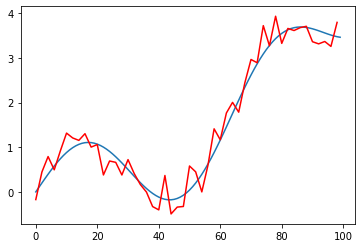

In [189]:
plt.plot(y)
plt.plot(xs, yns, 'r')

Let us define a translated gaussian kernel function for $\varphi$

In [185]:
def phi(n, x):
    return np.exp(-0.05*(x-n)**2)

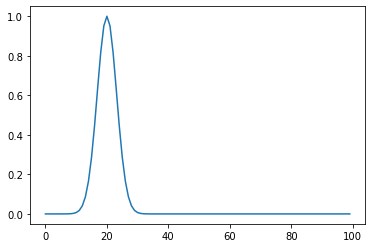

In [186]:
plt.plot(phi(20, x))

In [196]:
A = np.zeros((N//2, N//4)) # let A be rectangular s.t. its columns are independent (can be left-inverted)

In [205]:
for k in range(N//4):
    A[:, k] = phi(4*k, xs)

In [206]:
beta = np.linalg.inv(A.T@A)@(A.T@yns)

In [207]:
beta

array([-0.37278583,  0.71832798,  0.13140576,  0.94443894,  0.52738533,
        0.49294002,  0.21206568,  0.18015236,  0.64699151, -0.55011973,
        0.20989392, -0.21426334, -0.35272698,  0.74781209, -0.50112937,
        1.48043507,  0.48422405,  1.28464507,  1.70079861,  1.74008845,
        2.12801101,  1.13637142,  3.06122767, -0.05541057,  3.74167753])

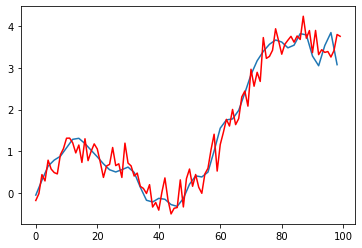

In [210]:
plt.plot(xs, A@beta)
plt.plot(yn, 'r')

Another common choice for $\varphi$ is to use polynomials.

In [212]:
Ap = np.zeros((N//2, N//4))
for k in range(N//4):
    Ap[:, k] = np.power(xs,k)

In [214]:
bp = np.linalg.inv(Ap.T@Ap)@(Ap.T@yns)

In [215]:
bp

array([-1.33254236e-01,  2.85917590e-01, -2.44619240e-02,  9.84506565e-04,
       -1.79368221e-05, -1.29627793e-07,  1.18147645e-08, -2.01310133e-10,
        1.45798034e-12, -3.93851847e-15,  6.34327447e-21,  1.05020938e-20,
       -2.13729368e-20, -7.44142657e-21,  1.09253242e-20, -2.34574051e-21,
       -1.70941571e-20, -1.35622597e-20,  1.19460503e-20,  1.23445994e-21,
       -2.90784192e-21,  1.18773607e-20,  1.44352377e-22,  4.69157566e-21,
       -6.37069853e-21])

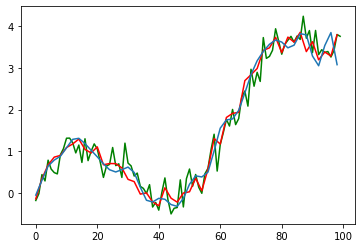

In [222]:
plt.plot(yn, 'g')
plt.plot(xs, Ap@bp, 'r')
plt.plot(xs, A@beta)
